In [5]:
# 0. Setup
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay, confusion_matrix

# Create folders if they do not exist
Path("results/figures").mkdir(parents=True, exist_ok=True)
Path("results/models").mkdir(parents=True, exist_ok=True)

pd.set_option("display.max_columns", None)
RANDOM_STATE = 42

In [7]:
# 1. Load data
csv_path = "../data/heart.csv"   
df = pd.read_csv(csv_path)

print("Shape:", df.shape)
df.head()

Shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
# 2. Basic cleanup
# Convert common missing markers to NaN
df = df.replace(["?", "NA", "N/A", "na", "n/a", ""], np.nan)

print("Columns:", list(df.columns))
print("Missing values per column:\n", df.isna().sum().sort_values(ascending=False))

Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Missing values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [9]:
# 3. Keep only rows for women
# Cleveland format uses sex: 1 male, 0 female
if "sex" not in df.columns:
    raise ValueError("Expected a 'sex' column in the CSV.")

women = df[df["sex"] == 0].copy()
print("Women subset shape:", women.shape)
women.head()

Women subset shape: (312, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
11,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1


Target counts:
 target
0     86
1    226
Name: count, dtype: int64


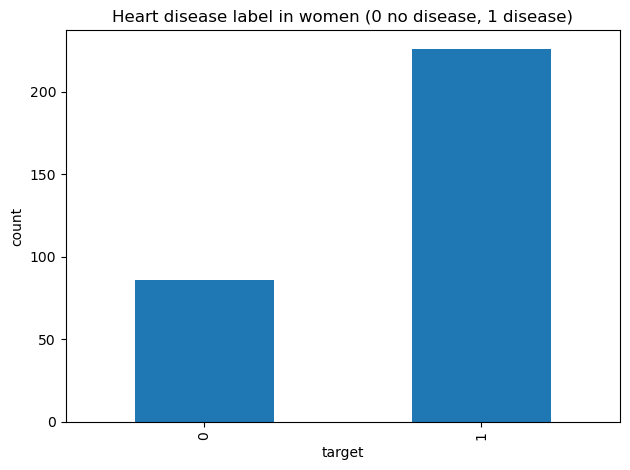

In [12]:
# 4. Target distribution for women
if "target" not in women.columns:
    raise ValueError("Expected a 'target' column for the label.")

print("Target counts:\n", women["target"].value_counts(dropna=False).sort_index())

ax = women["target"].value_counts().sort_index().plot(kind="bar")
ax.set_title("Heart disease label in women (0 no disease, 1 disease)")
ax.set_xlabel("target")
ax.set_ylabel("count")
plt.tight_layout()
plt.show()